In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import math
from HelperFunctions import PDGToColor

In [2]:
file = uproot.open('/Users/isobel/Desktop/DUNE/Ivysaurus/IvysaurusTrainingFiles_hist.root')
tree = file['ivyTrain/ivysaur']
branches = tree.arrays()
print(tree.keys())


['Run', 'Subrun', 'Event', 'TruePDG', 'Completeness', 'Purity', 'SpacePoints', 'ProjectionsU', 'ProjectionsV', 'ProjectionsW', 'DriftBoundariesU', 'DriftBoundariesV', 'DriftBoundariesW', 'WireBoundariesU', 'WireBoundariesV', 'WireBoundariesW', 'GridU', 'GridV', 'GridW']


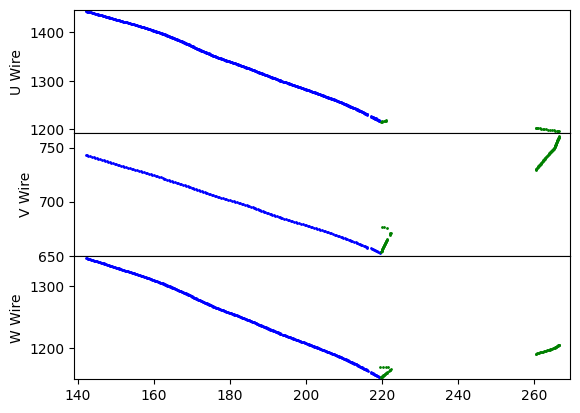

In [3]:
# Might be better just to plot them individually, could choose colour based on particle type

allDriftMin = 1e10
allDriftMax = -1e10
allWireMinU = 1e10
allWireMaxU = -1e10
allWireMinV = 1e10
allWireMaxV = -1e10
allWireMinW = 1e10
allWireMaxW = -1e10

for particleIndex in range(0, len(branches)):
    driftCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,0])
    driftCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,0])
    driftCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,0])
    wireCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,2])
    wireCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,2])
    wireCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,2])
    
    if len(branches['TruePDG'][particleIndex]) == 0 :
        continue
    
    if len(driftCoordsU) != 0 :
        allDriftMin = min(allDriftMin, driftCoordsU.min())
        allDriftMax = max(allDriftMax, driftCoordsU.max())
        allWireMinU = min(allWireMinU, wireCoordsU.min())
        allWireMaxU = max(allWireMaxU, wireCoordsU.max())
    
    if len(driftCoordsV) != 0 :
        allDriftMin = min(allDriftMin, driftCoordsV.min())
        allDriftMax = max(allDriftMax, driftCoordsV.max())
        allWireMinV = min(allWireMinV, wireCoordsV.min())
        allWireMaxV = max(allWireMaxV, wireCoordsV.max())

    if len(driftCoordsW) != 0 :
        allDriftMin = min(allDriftMin, driftCoordsW.min())
        allDriftMax = max(allDriftMax, driftCoordsW.max())
        allWireMinW = min(allWireMinW, wireCoordsW.min())
        allWireMaxW = max(allWireMaxW, wireCoordsW.max())
    
# Now lets draw plots!
plt.subplots(nrows = 3, ncols = 1, gridspec_kw = {'wspace': 0, 'hspace': 0})  
buffer = 3.0

                 
# ------------------------------
# Draw U
# ------------------------------

plt.subplot(3, 1, 1)

for particleIndex in range(0, len(branches)):
    driftCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,0])
    wireCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,2])
    particlePDG = branches['TruePDG'][particleIndex]
    
    if len(particlePDG) != 0:
        plt.scatter(driftCoordsU, wireCoordsU, s=1, c=PDGToColor(particlePDG[0]))

plt.xlim([allDriftMin - buffer, allDriftMax + buffer])
plt.ylim([allWireMinU - buffer, allWireMaxU + buffer])
plt.ylabel("U Wire")
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3, 1, 2)

# ------------------------------
# Draw V
# ------------------------------

for particleIndex in range(0, len(branches)):
    driftCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,0])
    wireCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,2])
    particlePDG = branches['TruePDG'][particleIndex]
    
    if len(particlePDG) != 0:
        plt.scatter(driftCoordsV, wireCoordsV, s=1, c=PDGToColor(particlePDG[0]))

plt.xlim([allDriftMin - buffer, allDriftMax + buffer])
plt.ylim([allWireMinV- buffer, allWireMaxV + buffer])
plt.ylabel("V Wire")
plt.gca().axes.get_xaxis().set_visible(False)

# ------------------------------
# Draw W
# ------------------------------

plt.subplot(3, 1, 3)

for particleIndex in range(0, len(branches)):
    driftCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,0])
    wireCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,2])
    particlePDG = branches['TruePDG'][particleIndex]
    
    if len(particlePDG) != 0:
        plt.scatter(driftCoordsW, wireCoordsW, s=1, c=PDGToColor(particlePDG[0]))

plt.xlim([allDriftMin - buffer, allDriftMax + buffer])
plt.ylim([allWireMinW - buffer, allWireMaxW + buffer])
plt.ylabel("W Wire")
    
plt.show()


PDG: 13


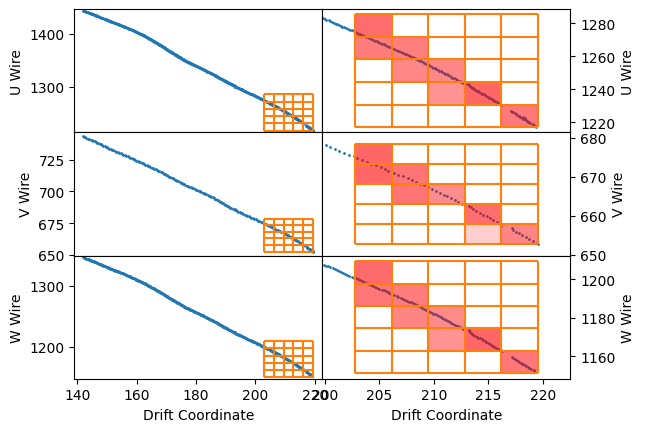

PDG: 2212


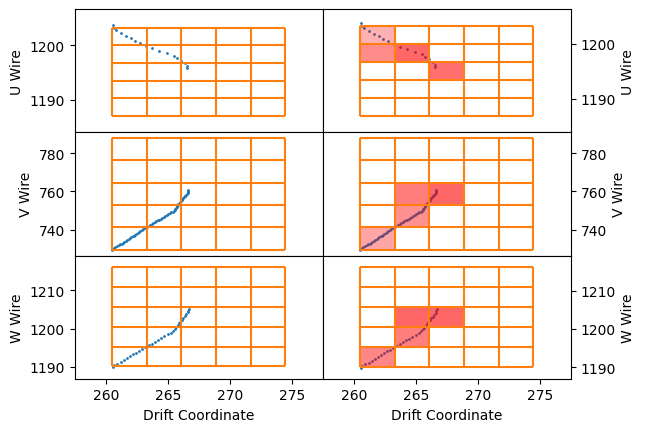

PDG: 2212


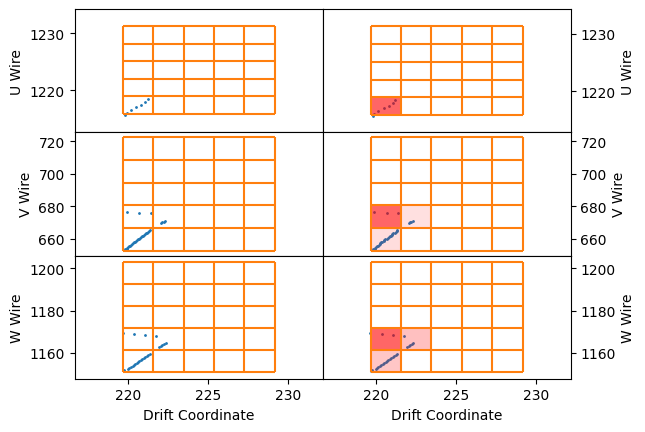

In [254]:
maxGridTransparency = 0.6

for particleIndex in range(len(branches)):
    
    # Get truth information
    particlePDG = branches['TruePDG'][particleIndex]
    
    if len(particlePDG) == 0 :
        continue
    
    # Get coordinates
    driftCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,0])
    driftCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,0])
    driftCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,0])

    wireCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,2])
    wireCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,2])
    wireCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,2])

    # Get grid boundaries
    driftBoundariesU = np.asarray(branches['DriftBoundariesU'][particleIndex])
    driftBoundariesV = np.asarray(branches['DriftBoundariesV'][particleIndex])
    driftBoundariesW = np.asarray(branches['DriftBoundariesW'][particleIndex])

    wireBoundariesU = np.asarray(branches['WireBoundariesU'][particleIndex])
    wireBoundariesV = np.asarray(branches['WireBoundariesV'][particleIndex])
    wireBoundariesW = np.asarray(branches['WireBoundariesW'][particleIndex])
    
    # Get grid!
    gridU = branches['GridU'][particleIndex]
    gridV = branches['GridV'][particleIndex]
    gridW = branches['GridW'][particleIndex]
    
    if (len(driftCoordsU) == 0 or len(driftCoordsV) == 0 or len(driftCoordsW) == 0):
        continue
    
    # Now lets draw plots!
    plt.subplots(nrows = 3, ncols = 2, gridspec_kw = {'wspace': 0, 'hspace': 0})

    globalDriftMin = min(driftCoordsU.min(), driftCoordsV.min(), driftCoordsW.min(), driftBoundariesU.min())
    globalDriftMax = max(driftCoordsU.max(), driftCoordsV.max(), driftCoordsW.max(), driftBoundariesU.max())

    driftLimits = [[globalDriftMin - buffer, globalDriftMax + buffer], [driftBoundariesU.min() - buffer, driftBoundariesU.max() + buffer]]
    wireLimitsU = [[min(wireCoordsU.min(), wireBoundariesU.min()) - buffer, max(wireCoordsU.max(), wireBoundariesU.max()) + buffer], [wireBoundariesU.min() - buffer, wireBoundariesU.max() + buffer]]
    wireLimitsV = [[min(wireCoordsV.min(), wireBoundariesV.min()) - buffer, max(wireCoordsV.max(), wireBoundariesV.max()) + buffer], [wireBoundariesV.min() - buffer, wireBoundariesV.max() + buffer]]
    wireLimitsW = [[min(wireCoordsW.min(), wireBoundariesW.min()) - buffer, max(wireCoordsW.max(), wireBoundariesW.max()) + buffer], [wireBoundariesW.min() - buffer, wireBoundariesW.max() + buffer]]

    print('PDG: ' + str(particlePDG[0]))
    
    count = 1;

    # ------------------------------
    # Draw U
    # ------------------------------

    for i in range(2):
        plt.subplot(3, 2, count)
        plt.scatter(driftCoordsU, wireCoordsU, s=1)
    
        plt.xlim(driftLimits[i])
        plt.ylim(wireLimitsU[i])
        plt.ylabel("U Wire")
    
        if i == 1: 
            plt.gca().axes.get_yaxis().tick_right() 
            plt.gca().axes.get_yaxis().set_label_position("right")
        
        plt.gca().axes.get_xaxis().set_visible(False)

        for boundary in driftBoundariesU:
            plt.vlines(boundary, wireBoundariesU.min(), wireBoundariesU.max(), color='tab:orange')

        for boundary in wireBoundariesU:
            plt.hlines(boundary, driftBoundariesU.min(), driftBoundariesU.max(), color='tab:orange')
            
        # Fill grid, with relative shading
        if i == 1:
            maxWeightU = -1e10

            for driftIndex in range(len(driftBoundariesU) - 1):
                for wireIndex in range(len(wireBoundariesU) - 1):

                    gridEntry = gridU[driftIndex][wireIndex]

                    if gridEntry > maxWeightU:
                        maxWeightU = gridEntry

            for driftIndex in range(len(driftBoundariesU) - 1):
                for wireIndex in range(len(wireBoundariesU) - 1):

                    gridEntry = gridU[driftIndex][wireIndex]

                    if gridEntry > 1e-10 :
                        plt.fill([driftBoundariesU[driftIndex], driftBoundariesU[driftIndex + 1], driftBoundariesU[driftIndex + 1], driftBoundariesU[driftIndex]], [wireBoundariesU[wireIndex], wireBoundariesU[wireIndex], wireBoundariesU[wireIndex + 1], wireBoundariesU[wireIndex + 1]], "r", alpha=(gridEntry * maxGridTransparency / maxWeightU))

        count += 1

    # ------------------------------
    # Draw V
    # ------------------------------

    for i in range(2):
        plt.subplot(3, 2, count)
        plt.scatter(driftCoordsV, wireCoordsV, s=1)

        plt.xlim(driftLimits[i])
        plt.ylim(wireLimitsV[i])
        plt.ylabel("V Wire")

        if i == 1: 
            plt.gca().axes.get_yaxis().tick_right() 
            plt.gca().axes.get_yaxis().set_label_position("right")

        plt.gca().axes.get_xaxis().set_visible(False)

        for boundary in driftBoundariesV:
            plt.vlines(boundary, wireBoundariesV.min(), wireBoundariesV.max(), color='tab:orange')

        for boundary in wireBoundariesV:
            plt.hlines(boundary, driftBoundariesV.min(), driftBoundariesV.max(), color='tab:orange')

        # Fill grid, with relative shading
        if i == 1:
            maxWeightV = -1e10

            for driftIndex in range(len(driftBoundariesV) - 1):
                for wireIndex in range(len(wireBoundariesV) - 1):

                    gridEntry = gridV[driftIndex][wireIndex]

                    if gridEntry > maxWeightV:
                        maxWeightV = gridEntry

            for driftIndex in range(len(driftBoundariesV) - 1):
                for wireIndex in range(len(wireBoundariesV) - 1):

                    gridEntry = gridV[driftIndex][wireIndex]

                    if gridEntry > 1e-10 :
                        plt.fill([driftBoundariesV[driftIndex], driftBoundariesV[driftIndex + 1], driftBoundariesV[driftIndex + 1], driftBoundariesV[driftIndex]], [wireBoundariesV[wireIndex], wireBoundariesV[wireIndex], wireBoundariesV[wireIndex + 1], wireBoundariesV[wireIndex + 1]], "r", alpha=(gridEntry * maxGridTransparency / maxWeightV)) 

        count += 1

    # ------------------------------
    # Draw W
    # ------------------------------

    for i in range(2):
        plt.subplot(3, 2, count)
        plt.scatter(driftCoordsW, wireCoordsW, s=1)

        plt.xlim(driftLimits[i])
        plt.ylim(wireLimitsW[i])
        plt.ylabel("W Wire")
        plt.xlabel("Drift Coordinate")

        if i == 1: 
            plt.gca().axes.get_yaxis().tick_right() 
            plt.gca().axes.get_yaxis().set_label_position("right")

        for boundary in driftBoundariesW:
            plt.vlines(boundary, wireBoundariesW.min(), wireBoundariesW.max(), color='tab:orange')

        for boundary in wireBoundariesW:
            plt.hlines(boundary, driftBoundariesW.min(), driftBoundariesW.max(), color='tab:orange')
            
        # Fill grid, with relative shading
        if i == 1:
            maxWeightW = -1e10

            for driftIndex in range(len(driftBoundariesW) - 1):
                for wireIndex in range(len(wireBoundariesW) - 1):

                    gridEntry = gridW[driftIndex][wireIndex]

                    if gridEntry > maxWeightW:
                        maxWeightW = gridEntry

            for driftIndex in range(len(driftBoundariesW) - 1):
                for wireIndex in range(len(wireBoundariesW) - 1):

                    gridEntry = gridW[driftIndex][wireIndex]

                    if gridEntry > 1e-10 :
                        plt.fill([driftBoundariesW[driftIndex], driftBoundariesW[driftIndex + 1], driftBoundariesW[driftIndex + 1], driftBoundariesW[driftIndex]], [wireBoundariesW[wireIndex], wireBoundariesW[wireIndex], wireBoundariesW[wireIndex + 1], wireBoundariesW[wireIndex + 1]], "r", alpha=(gridEntry * maxGridTransparency / maxWeightW)) 

        count += 1
        
    plt.show()